In [1]:
import sys
from pathlib import Path

In [2]:
from ethicml.algorithms.inprocess import GPyT, GPyTDemPar, GPyTEqOdds, LR, SVM, Agarwal, Kamiran, Kamishima, LR, ZafarEqOpp
from ethicml.evaluators import evaluate_models, CrossValidator, run_metrics
from ethicml.data import Compas, Adult, load_data, Toy
from ethicml.metrics import Accuracy, ProbPos, TPR, TNR, AbsCV
from ethicml.preprocessing import train_test_split
from ethicml.visualisation import plot_mean_std_box

In [3]:
# YOU DON'T HAVE TO UNDERSTAND THE CODE IN THIS CELL
# we only tell the model where the "run.py" is and where the python executable is
code_dir = Path('..')
def gp(**kwargs):
    return GPyT(code_dir=code_dir, **kwargs)
def gp_dp(**kwargs):
    return GPyTDemPar(code_dir=code_dir, **kwargs)
def gp_eo(**kwargs):
    return GPyTEqOdds(code_dir=code_dir, **kwargs)

In [4]:
# specify flags for GP
gp_flags = dict(epochs=71, length_scale=1.21, use_loo=False, iso=False, mean='ZeroMean', cov='RBFKernel', gpu='1')

In [11]:
algos = []

# algos += [gp(s_as_input=False, flags=gp_flags)]
# algos += [gp_dp(epochs=70, s_as_input=True)]
# for pr in [0.7]:
#     algos += [gp_dp(s_as_input=True, tnr1=tnr_in_true_race, tnr0=tnr_in_true_race, tpr0=tpr, tpr1=tpr, flags=gp_flags)]
#     algos += [gp_dp(s_as_input=False, tnr1=tnr_in_false_race, tnr0=tnr_in_false_race, tpr0=tpr, tpr1=tpr, flags=gp_flags)]

# algos += [gp_dp(s_as_input=False, target_mode=GPyTDemPar.MEAN)]
# algos += [gp_dp(s_as_input=False, target_mode=GPyTDemPar.MAX)]
algos += [gp_dp(s_as_input=False, target_acceptance=0.3)]

In [12]:
adult_race = Adult("Race")
adult_race.sens_attrs = ['race_White']
data = [
#     Compas("Race"),
#     Compas("Sex"),
    adult_race,
    Adult("Sex"),
]

In [13]:
results = evaluate_models(
    datasets=data,
    inprocess_models=algos,
    metrics=[Accuracy(), ProbPos(), TPR(), TNR(), AbsCV()],
    per_sens_metrics=[ProbPos(), TPR(), TNR()], 
    repeats=10,
    topic="just_gp",
    proportional_splits=True,
)

100%|██████████| 20/20 [2:21:13<00:00, 424.29s/it, model=GPyT_dem_par_in_False_tar_0.3, dataset=Adult Sex, transform=no_transform, repeat=9]   


In [14]:
results

Accuracy  \
dataset    transform    model                         repeat              
Adult Race no_transform GPyT_in_False                 0-0      0.847302   
                        GPyT_dem_par_in_False         0-0      0.821871   
                        GPyT_dem_par_in_False_tar_max 0-0      0.850287   
                        GPyT_in_False                 1-2410   0.846749   
                        GPyT_dem_par_in_False         1-2410   0.851504   
...                                                                 ...   
Adult Sex  no_transform GPyT_dem_par_in_False_tar_0.3 5-12050  0.837369   
                                                      6-14460  0.842565   
                                                      7-16870  0.838917   
                                                      8-19280  0.850636   
                                                      9-21690  0.843007   

                                                               CV absolute  \
dataset    transform    model                         repeat                 
Adult Race no_transform GPyT_in_False                 0-0         0.883576   
                        GPyT_dem_par_in_False         0-0         0.917628   
                        GPyT_dem_par_in_False_tar_max 0-0         0.907789   
                        GPyT_in_False                 1-2410      0.914183   
                        GPyT_dem_par_in_False         1-2410      0.924062   
...                                                                    ...   
Adult Sex  no_transform GPyT_dem_par_in_False_tar_0.3 5-12050     0.896164   
                                                      6-14460     0.889667   
                                                      7-16870     0.880987   
                                                      8-19280     0.893379   
                                                      9-21690     0.881759   

                                                                    TNR  \
dataset    transform    model                         repeat              
Adult Race no_transform GPyT_in_False                 0-0      0.900926   
                        GPyT_dem_par_in_False         0-0      0.937675   
                        GPyT_dem_par_in_False_tar_max 0-0      0.918859   
                        GPyT_in_False                 1-2410   0.931207   
                        GPyT_dem_par_in_False         1-2410   0.933706   
...                                                                 ...   
Adult Sex  no_transform GPyT_dem_par_in_False_tar_0.3 5-12050  0.884757   
                                                      6-14460  0.904748   
                                                      7-16870  0.898427   
                                                      8-19280  0.921505   
                                                      9-21690  0.893576   

                                                               TNR_race_White_0  \
dataset    transform    model                         repeat                      
Adult Race no_transform GPyT_in_False                 0-0              0.939850   
                        GPyT_dem_par_in_False         0-0              0.968985   
                        GPyT_dem_par_in_False_tar_max 0-0              0.946429   
                        GPyT_in_False                 1-2410           0.954887   
                        GPyT_dem_par_in_False         1-2410           0.951128   
...                                                                         ...   
Adult Sex  no_transform GPyT_dem_par_in_False_tar_0.3 5-12050               NaN   
                                                      6-14460               NaN   
                                                      7-16870               NaN   
                                                      8-19280               NaN   
                                                      9-21690               NaN   

                

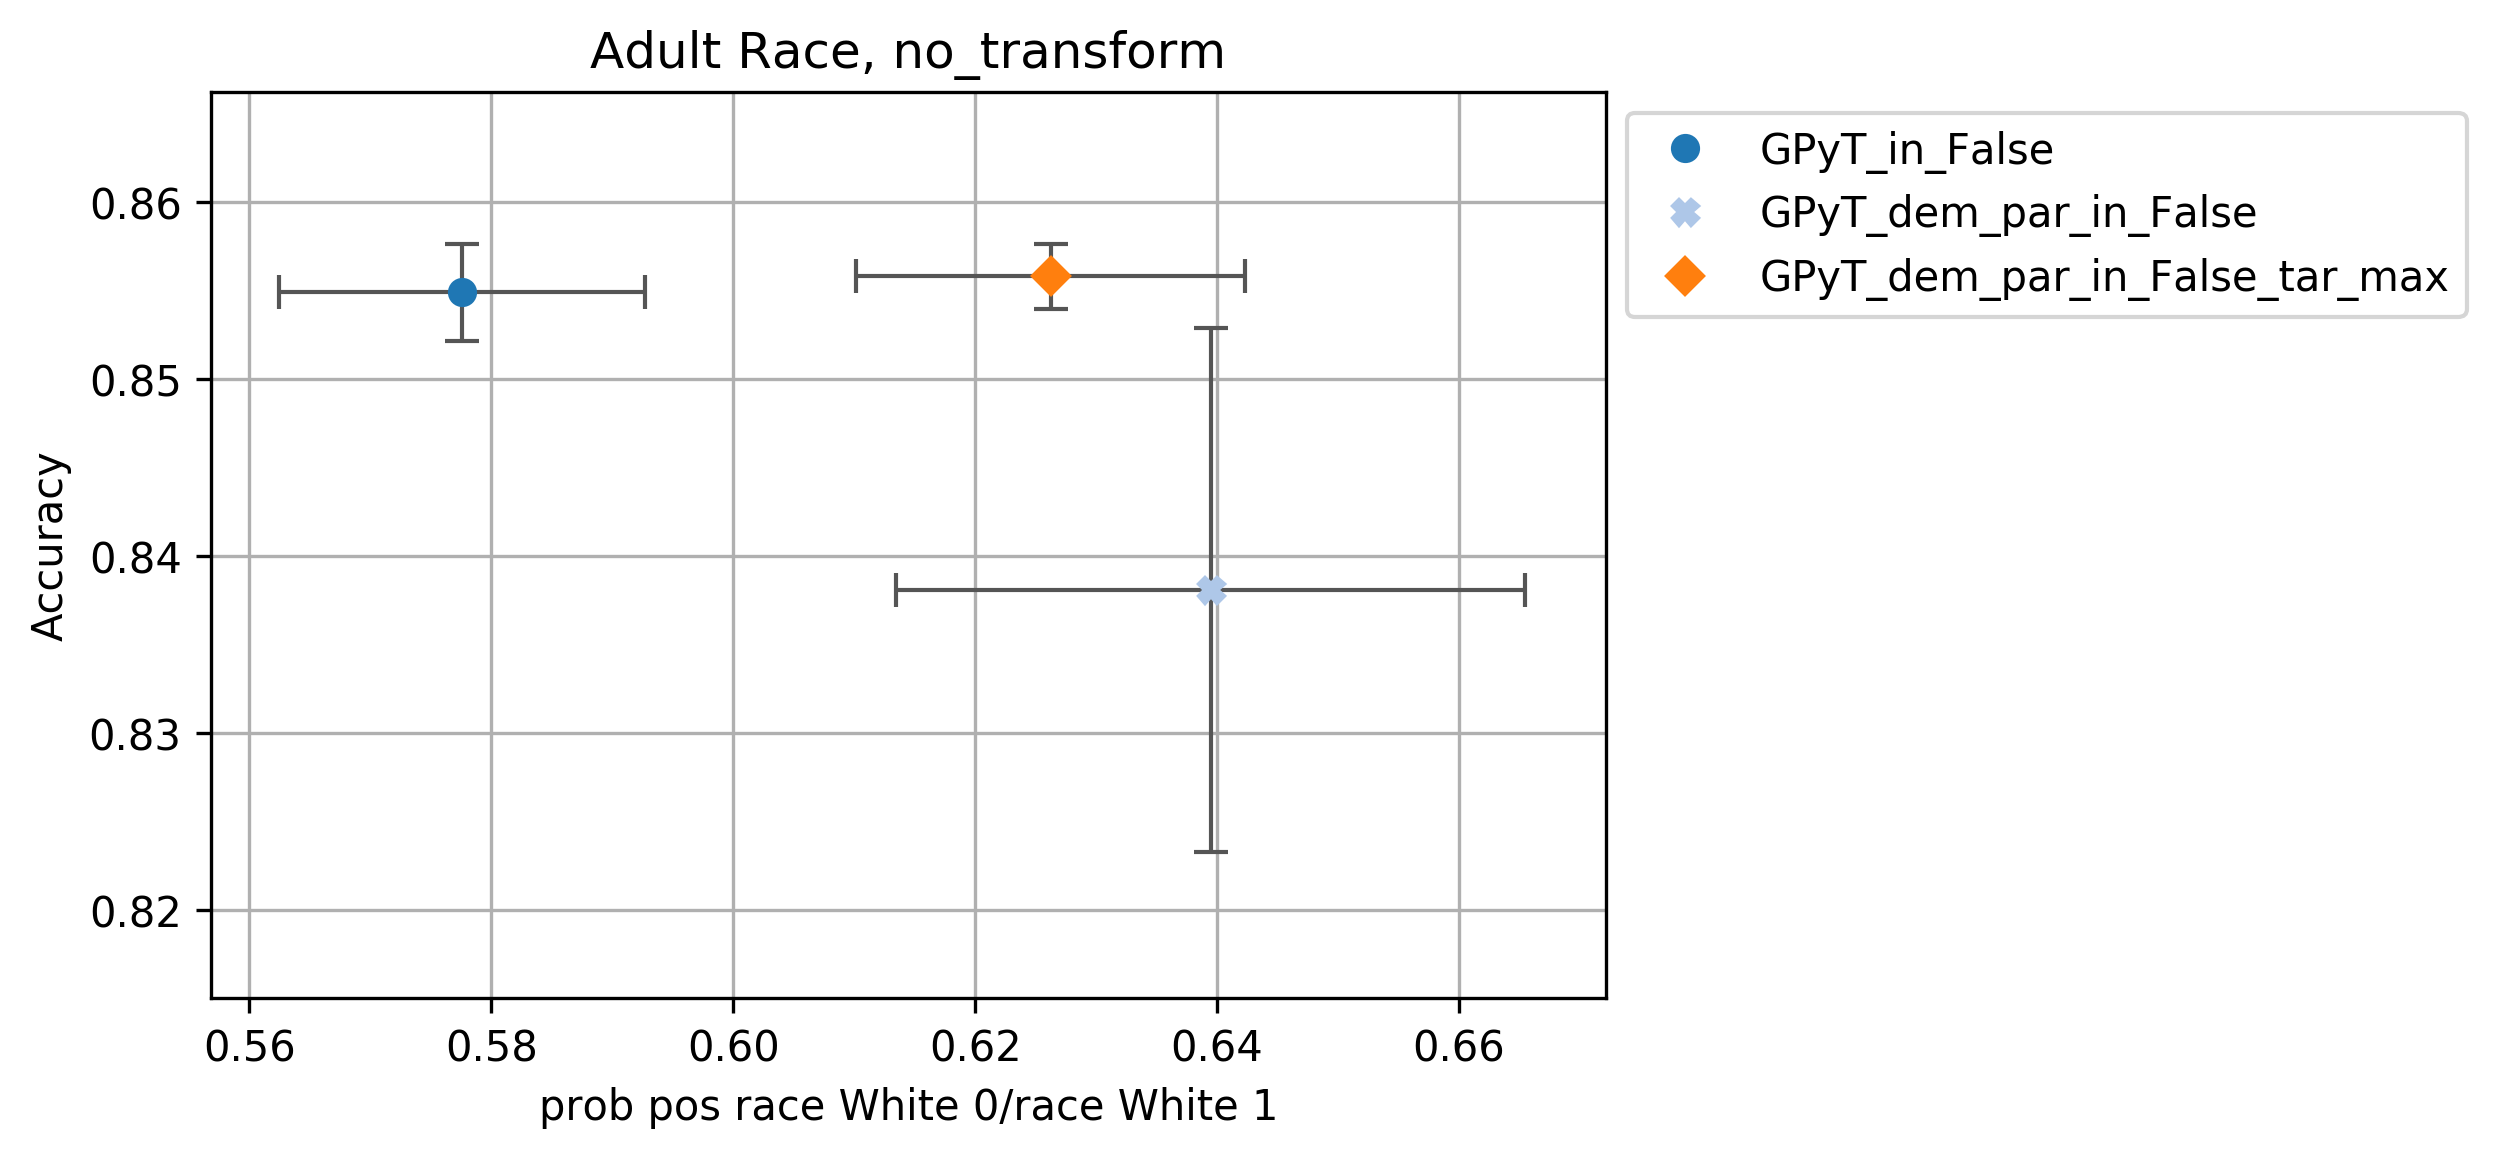

In [9]:
# figs_plots = plot_mean_std_box(results.iloc[13:22], Accuracy(), "TPR")#_race_0/race_1")
plot_mean_std_box(results, "Accuracy", "prob_pos_race_White_0/race_White_1", save=False, use_cross=True)[0][0]


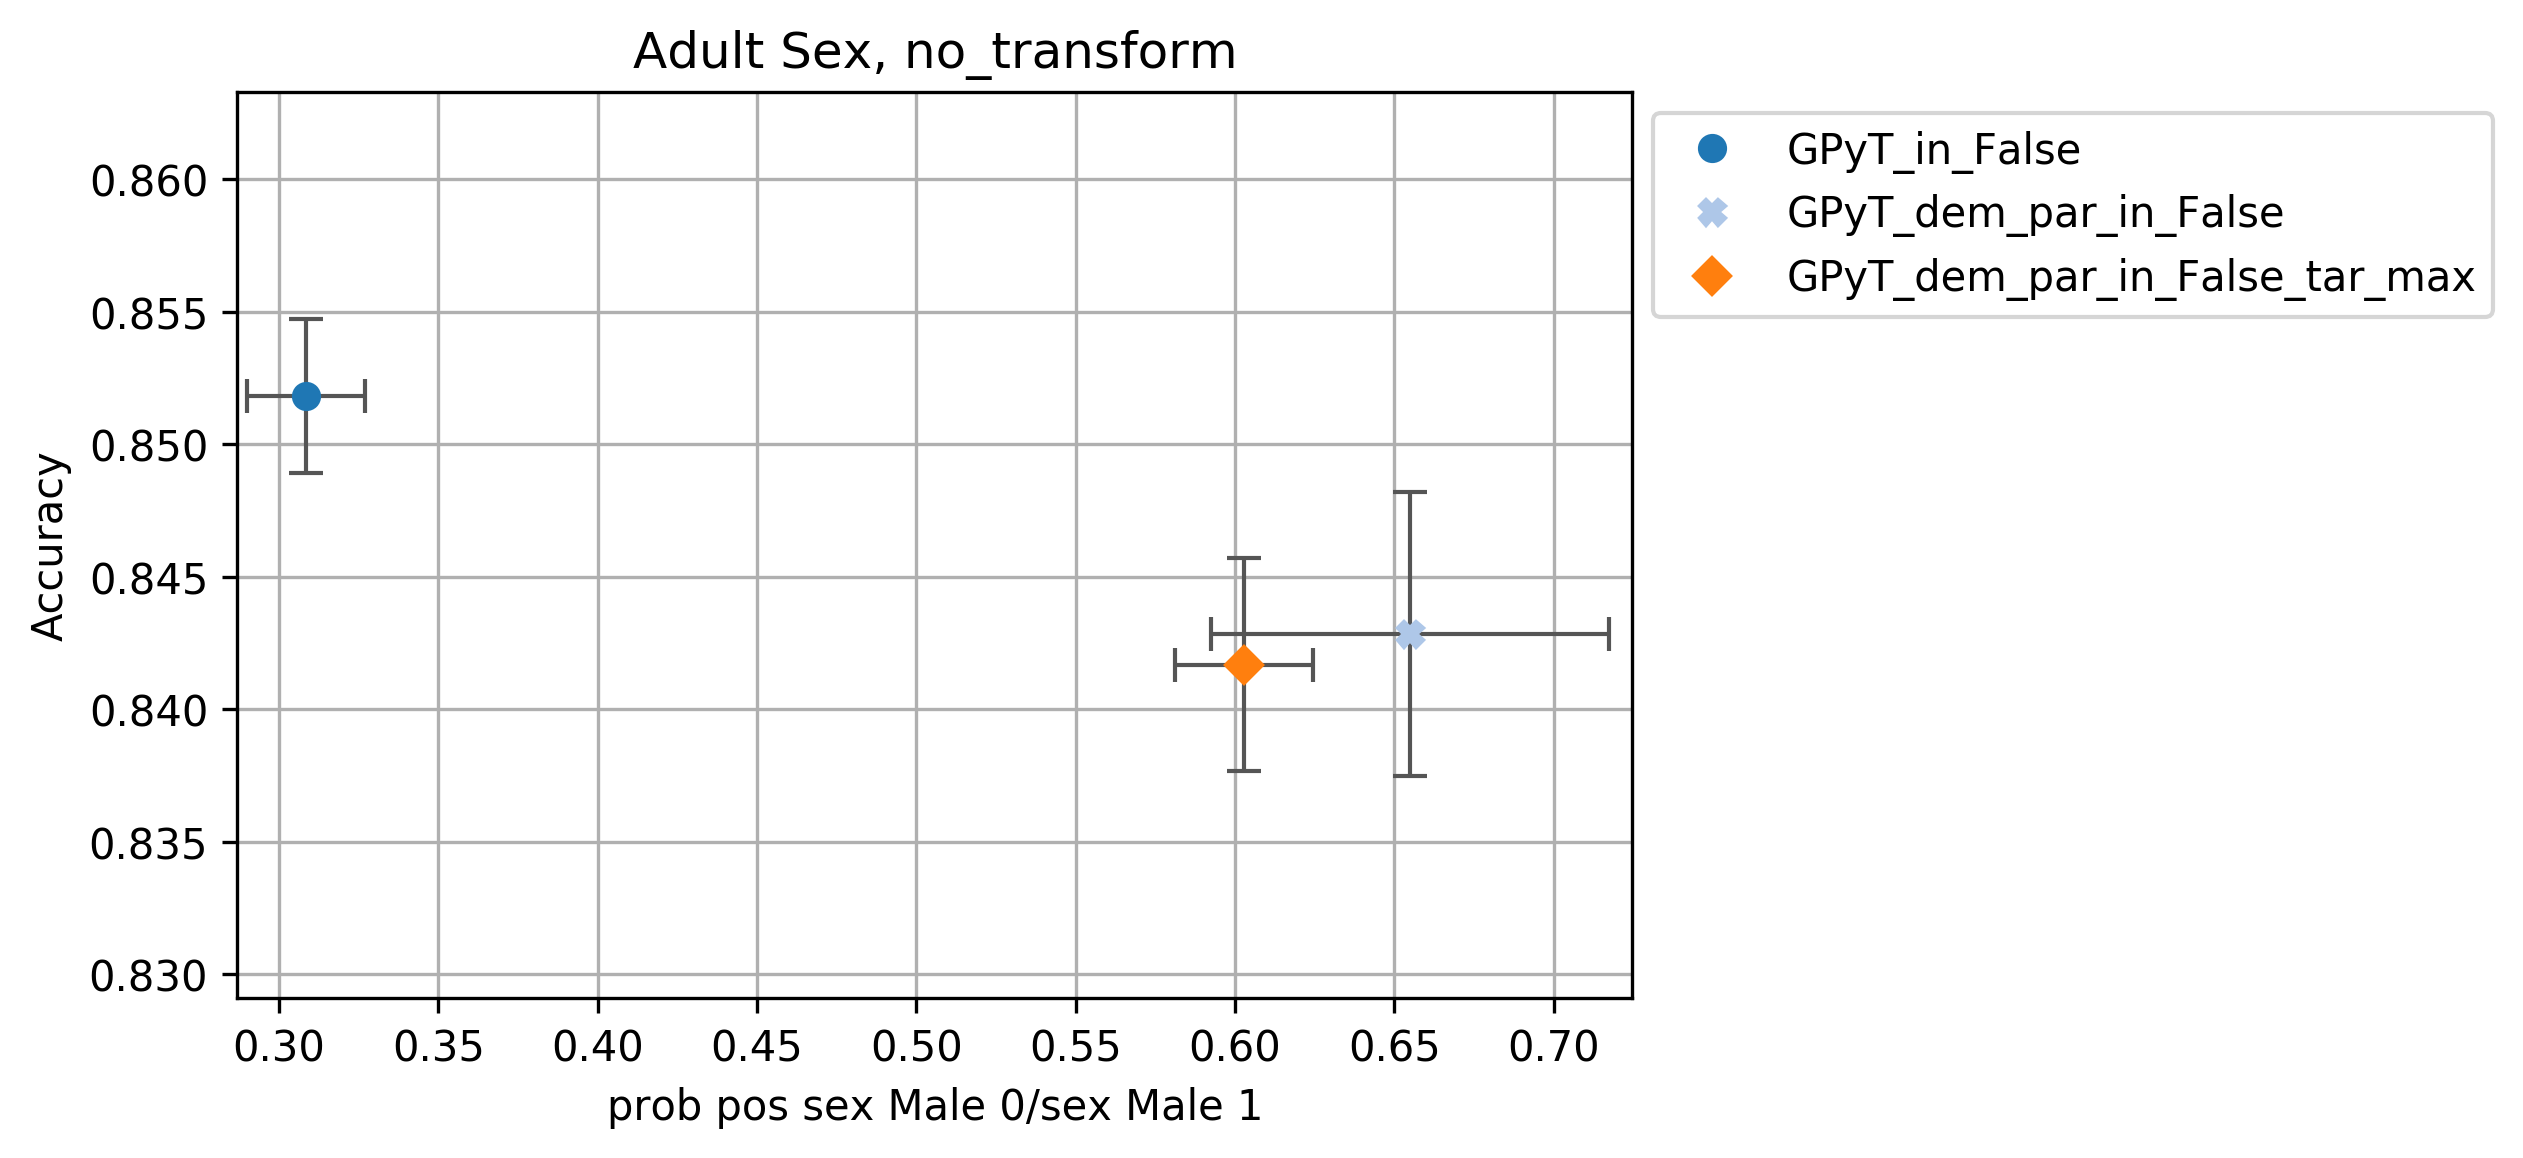

In [10]:
# figs_plots = plot_mean_std_box(results.iloc[13:22], Accuracy(), "TPR")#_race_0/race_1")
plot_mean_std_box(results, "Accuracy", "prob_pos_sex_Male_0/sex_Male_1", save=False, use_cross=True)[0][0]


In [9]:
train, test = train_test_split(load_data(Adult()))

In [10]:
# Fair grid search
primary = Accuracy()
fair_measure = AbsCV()
hyperparams = dict(C=[1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7])
lr_cv = CrossValidator(LR, hyperparams, folds=5)
lr_cv.run(train, measures=[primary, fair_measure])
lr_cv.best_hyper_params(primary)

fold_0_model_Logistic Regression, C=1_completed
fold_0_model_Logistic Regression, C=0.1_completed
fold_0_model_Logistic Regression, C=0.01_completed
fold_0_model_Logistic Regression, C=0.001_completed
fold_0_model_Logistic Regression, C=0.0001_completed
fold_0_model_Logistic Regression, C=1e-05_completed
fold_0_model_Logistic Regression, C=1e-06_completed
fold_0_model_Logistic Regression, C=1e-07_completed
fold_1_model_Logistic Regression, C=1_completed
fold_1_model_Logistic Regression, C=0.1_completed
fold_1_model_Logistic Regression, C=0.01_completed
fold_1_model_Logistic Regression, C=0.001_completed
fold_1_model_Logistic Regression, C=0.0001_completed
fold_1_model_Logistic Regression, C=1e-05_completed
fold_1_model_Logistic Regression, C=1e-06_completed
fold_1_model_Logistic Regression, C=1e-07_completed
fold_2_model_Logistic Regression, C=1_completed
fold_2_model_Logistic Regression, C=0.1_completed
fold_2_model_Logistic Regression, C=0.01_completed
fold_2_model_Logistic Regressio

{'C': 0.1}

In [11]:
lr_best_acc = lr_cv.results.get_best_result(primary)
lr_best_fair = lr_cv.results.get_best_in_top_k(primary, fair_measure, top_k=3)
print("best accuracy:", lr_best_acc)
print("best fair(+accuracy):", lr_best_fair)

best accuracy: ResultTuple(params={'C': 0.1}, fold_id=-1, scores={'Accuracy': 0.8460072554374714, 'CV absolute': 0.825007917407934})
best fair(+accuracy): ResultTuple(params={'C': 1e-06}, fold_id=-1, scores={'Accuracy': 0.7909169578659723, 'CV absolute': 0.9530144052067022})


In [12]:
lr_best_acc_model = LR(**lr_best_acc.params)
results_cv = evaluate_models(
    datasets=[Adult()],
    inprocess_models=[LR(**lr_best_fair.params), lr_best_acc_model],
    metrics=[Accuracy(), ProbPos(), TPR(), TNR()],
    per_sens_metrics=[ProbPos(), TPR(), TNR()], 
    repeats=3,
    delete_prev=True,  # delete previous results
)
results_cv

100%|██████████| 6/6 [00:03<00:00,  1.82it/s, model=Logistic Regression, C=0.1, dataset=Adult Sex, transform=no_transform, repeat=2]  


Accuracy  \
dataset   transform    model                        repeat             
Adult Sex no_transform Logistic Regression, C=1e-06 0-2410  0.789829   
                       Logistic Regression, C=0.1   0-2410  0.851852   
                       Logistic Regression, C=1e-06 1-4820  0.788281   
                       Logistic Regression, C=0.1   1-4820  0.843339   
                       Logistic Regression, C=1e-06 2-7230  0.793367   
                       Logistic Regression, C=0.1   2-7230  0.849972   

                                                                 TNR  \
dataset   transform    model                        repeat             
Adult Sex no_transform Logistic Regression, C=1e-06 0-2410  0.962122   
                       Logistic Regression, C=0.1   0-2410  0.930140   
                       Logistic Regression, C=1e-06 1-4820  0.961874   
                       Logistic Regression, C=0.1   1-4820  0.935422   
                       Logistic Regression, C=1e-06 2-7230  0.964702   
                       Logistic Regression, C=0.1   2-7230  0.934722   

                                                            TNR_sex_Male_0  \
dataset   transform    model                        repeat                   
Adult Sex no_transform Logistic Regression, C=1e-06 0-2410        0.970254   
                       Logistic Regression, C=0.1   0-2410        0.974168   
                       Logistic Regression, C=1e-06 1-4820        0.967232   
                       Logistic Regression, C=0.1   1-4820        0.982652   
                       Logistic Regression, C=1e-06 2-7230        0.967868   
                       Logistic Regression, C=0.1   2-7230        0.978056   

                                                            TNR_sex_Male_0-sex_Male_1  \
dataset   transform    model                        repeat                              
Adult Sex no_transform Logistic Regression, C=1e-06 0-2410                   0.013044   
                       Logistic Regression, C=0.1   0-2410                   0.070622   
                       Logistic Regression, C=1e-06 1-4820                   0.008689   
                       Logistic Regression, C=0.1   1-4820                   0.076589   
                       Logistic Regression, C=1e-06 2-7230                   0.005081   
                       Logistic Regression, C=0.1   2-7230                   0.069547   

                                                            TNR_sex_Male_0/sex_Male_1  \
dataset   transform    model                        repeat                              
Adult Sex no_transform Logistic Regression, C=1e-06 0-2410                   0.986556   
                       Logistic Regression, C=0.1   0-2410                   0.927505   
                       Logistic Regression, C=1e-06 1-4820                   0.991017   
                       Logistic Regression, C=0.1   1-4820                   0.922058   
                       Logistic Regression, C=1e-06 2-7230                   0.994750   
                       Logistic Regression, C=0.1   2-7230                   0.928892   

                                                            TNR_sex_Male_1  \
dataset   transform    model                        repeat                   
Adult Sex no_transform Logistic Regression, C=1e-06 0-2410        0.957210   
                       Logistic Regression, C=0.1   0-2410        0.903546   
                       Logistic Regression, C=1e-06 1-4820        0.958543   
                       Logistic Regression, C=0.1   1-4820        0.906063   
                       Logistic Regression, C=1e-06 2-7230        0.962787   
                       Logistic Regression, C=0.1   2-7230        0.908509   

                                                                 TPR  \
dataset   transform    model                        repeat             
Adult Sex no_transform Logistic Regression, C=1e-06 0-2410  0.272566   
              

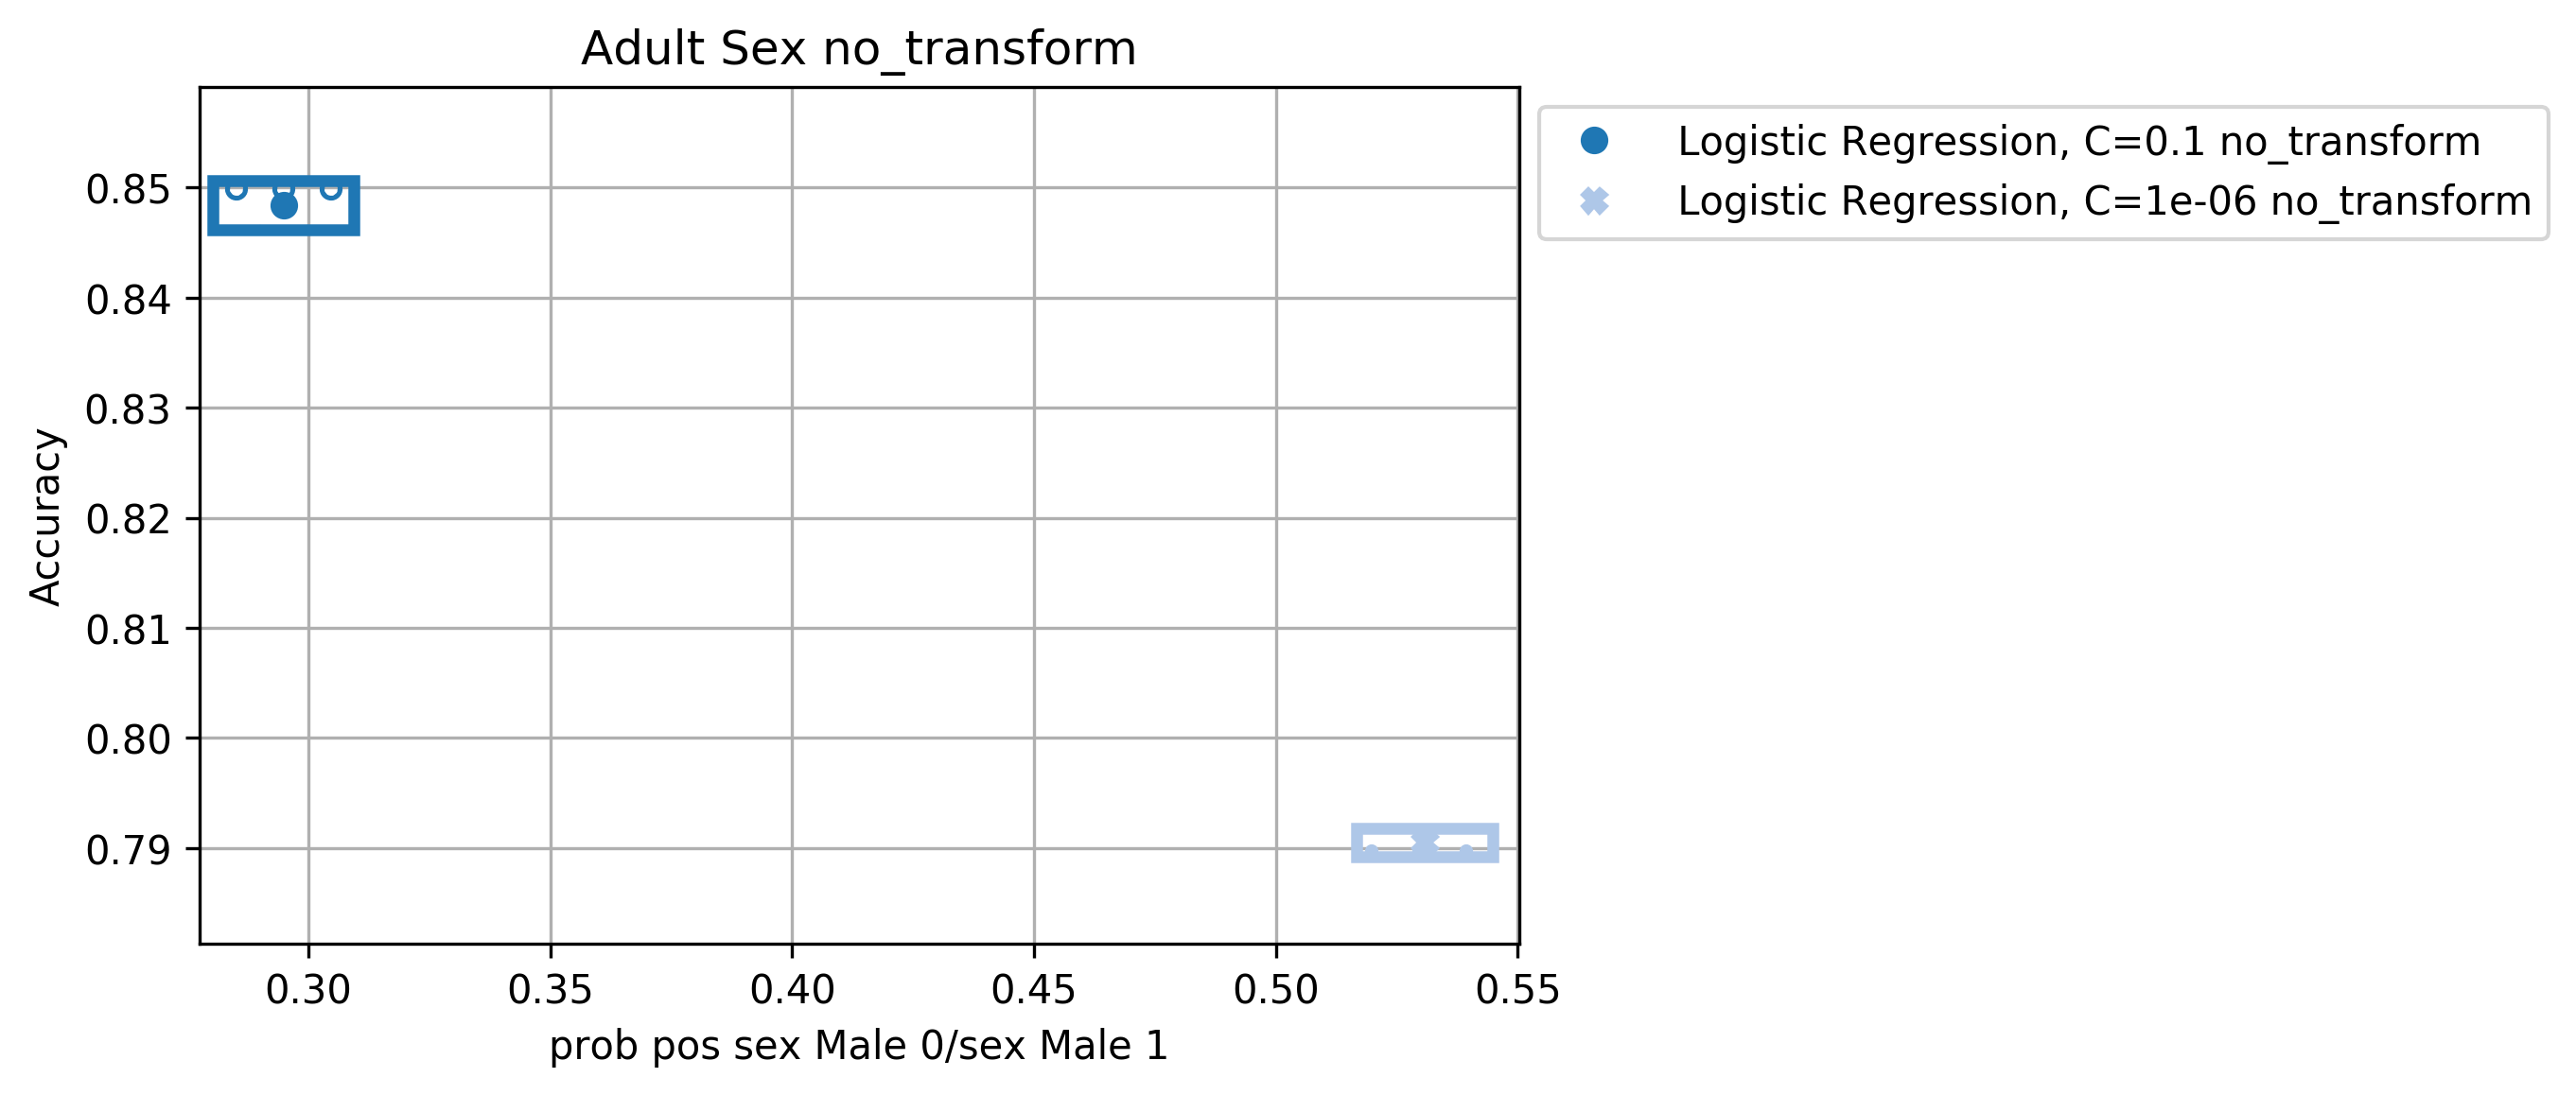

In [13]:
figs_plots = plot_mean_std_box(results_cv, Accuracy(), ProbPos(), save=False)
figs_plots[1][0]